<a href="https://colab.research.google.com/github/igorlnunes/descricao_cachorros/blob/main/DesafioImersaoAlura_RecImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalação da dependência - Google GenerativeAI

In [1]:
!pip install -q -U google-generativeai

Importação das bibliotecas

In [2]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

import PIL.Image
import urllib.request
from PIL import Image

Configuração da API KEY


In [3]:
from google.colab import userdata
google_api_key = userdata.get('SECRET_DATA')

genai.configure(api_key=google_api_key)


Inserção da imagem - tratamento dos headers da imagem

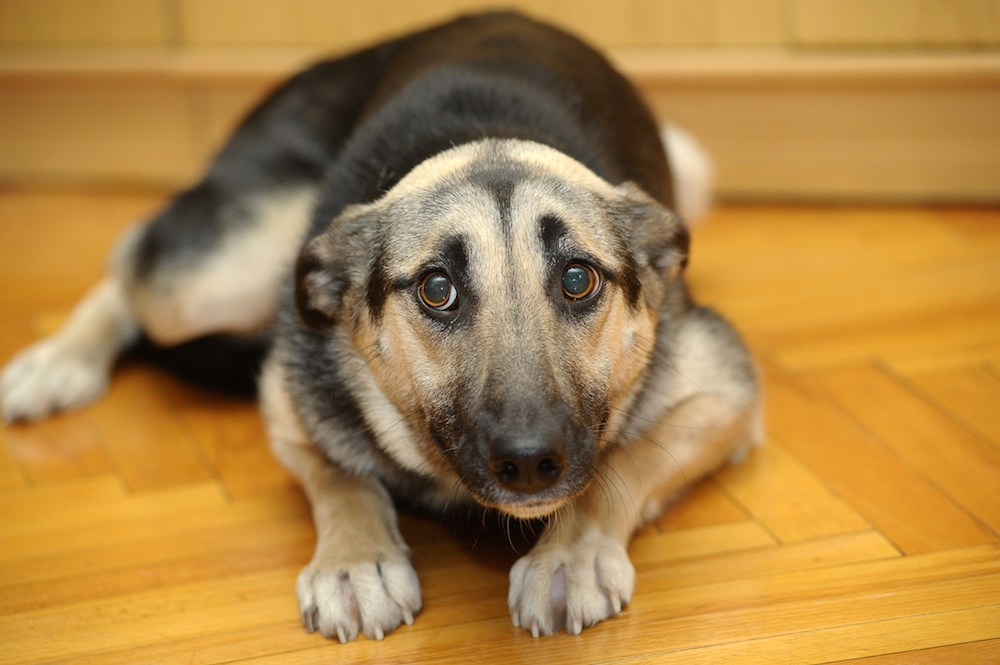

In [4]:
# Opening the image for Image Understanding
# lack user-agent - https://stackoverflow.com/a/69783096
opener = urllib.request.build_opener()
opener.addheaders = [('User-Agent', 'MyApp/1.0')]
urllib.request.install_opener(opener)
urllib.request.urlretrieve(
  'https://i.imgur.com/gzdy2Lo.jpeg',
   "dog.jpeg")

image = PIL.Image.open("dog.jpeg")
image

Função para Transformar o retorno em Markdown

In [5]:
#to markdown
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

Geração da descrição a partir da imagem do animal

In [12]:
model = genai.GenerativeModel("gemini-pro-vision")

response = model.generate_content(
    ["Descrição: Cachorro de pelo branco, porte pequeno, com orelhas caidas sobre a cabeça, rabo branco fucinho rosado. Descreva o cachorro da imagem, não descreva nada. Mesmo formato da descrição de exemplo.", image],
    stream=True
)
response.resolve()
to_markdown(response.text)

>  Cachorro de pelo marrom e preto, porte médio, com orelhas pontudas e eretas, rabo marrom escuro, focinho preto.

Formatação do texto para a publicação no banco de dados dos animais

In [13]:
prompt = f"Reescreve esse texto neste formato:/n - Raça: /n -Porte: /n -Outras Características: /n - Hashtags associadas: /n{response.text}"

generation_config = {
    "candidate_count": 1,
    "temperature": 0.5,
}

model_2 = genai.GenerativeModel("gemini-1.0-pro",
                                generation_config=generation_config)
response = model_2.generate_content(prompt)
print(response.text)

- Raça: Não especificada
- Porte: Médio
- Outras Características:
    - Pelo marrom e preto
    - Orelhas pontudas e eretas
    - Rabo marrom escuro
    - Focinho preto
- Hashtags associadas: #cachorro #portemedio #orelhaspontudas #pelocolorido #focinhopreto
